In [1]:
import flyvision
from flyvision import connectome_file
from flyvision import ConnectomeDir, ConnectomeView

# Connectome
This notebook illustrates the constructed spatially invariant connectome from local reconstructions that builds the
scaffold of the network.

In [2]:
# The ConnectomeDir class compiles the network graph from `data/connectome/fib25-fib19_v2.2.json`.
# This json-file includes a list of cell types (`nodes`) and average convolutional filters 
# (anatomical receptive fields) (`edges`) that are scattered across a regular hexagonal lattice 
# of 15 column extent and stored on the hierarchical filesystem as h5-files.
config = dict(file=connectome_file, extent=15, n_syn_fill=1)
connectome = ConnectomeDir(config)

In [3]:
# our network models 45,669 cells represented in this table of nodes
connectome.nodes.to_df()

,role,v,u,type
0,input,0,-15,R1
1,input,1,-15,R1
2,input,2,-15,R1
3,input,3,-15,R1
4,input,4,-15,R1
...,...,...,...,...
45664,output,-4,15,TmY18
45665,output,-3,15,TmY18
45666,output,-2,15,TmY18
45667,output,-1,15,TmY18


In [4]:
# our network models 1,513,231 synapses represented in this table of edges
connectome.edges.to_df()

,target_index,n_syn_certainty,target_u,edge_type,target_v,source_index,dv,du,n_syn,source_v,source_u,target_type,sign,source_type
0,5768,5.859477,-15,chem,0,0,0,0,40.0,0,-15,L1,-1.0,R1
1,5769,5.859477,-15,chem,1,1,0,0,40.0,1,-15,L1,-1.0,R1
2,5770,5.859477,-15,chem,2,2,0,0,40.0,2,-15,L1,-1.0,R1
3,5771,5.859477,-15,chem,3,3,0,0,40.0,3,-15,L1,-1.0,R1
4,5772,5.859477,-15,chem,4,4,0,0,40.0,4,-15,L1,-1.0,R1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513226,45664,2.239571,15,chem,-4,45664,0,0,1.0,-4,15,TmY18,1.0,TmY18
1513227,45665,2.239571,15,chem,-3,45665,0,0,1.0,-3,15,TmY18,1.0,TmY18
1513228,45666,2.239571,15,chem,-2,45666,0,0,1.0,-2,15,TmY18,1.0,TmY18
1513229,45667,2.239571,15,chem,-1,45667,0,0,1.0,-1,15,TmY18,1.0,TmY18


## Connectivity between identified cell types

Identified connectivity between 64 cell types, represented by total number of input synapses from all neurons of a given presynaptic cell type to a single postsynaptic of a given cell type. Blue color indicates putative hyperpolarizing inputs, red putative depolarizing inputs as inferred from neurotransmitter and receptor profiling. Size of squares indicates number of input synapses.

In [5]:
# the ConnectomeView class provides visualizations of the connectome data
connectome_view = ConnectomeView(connectome)

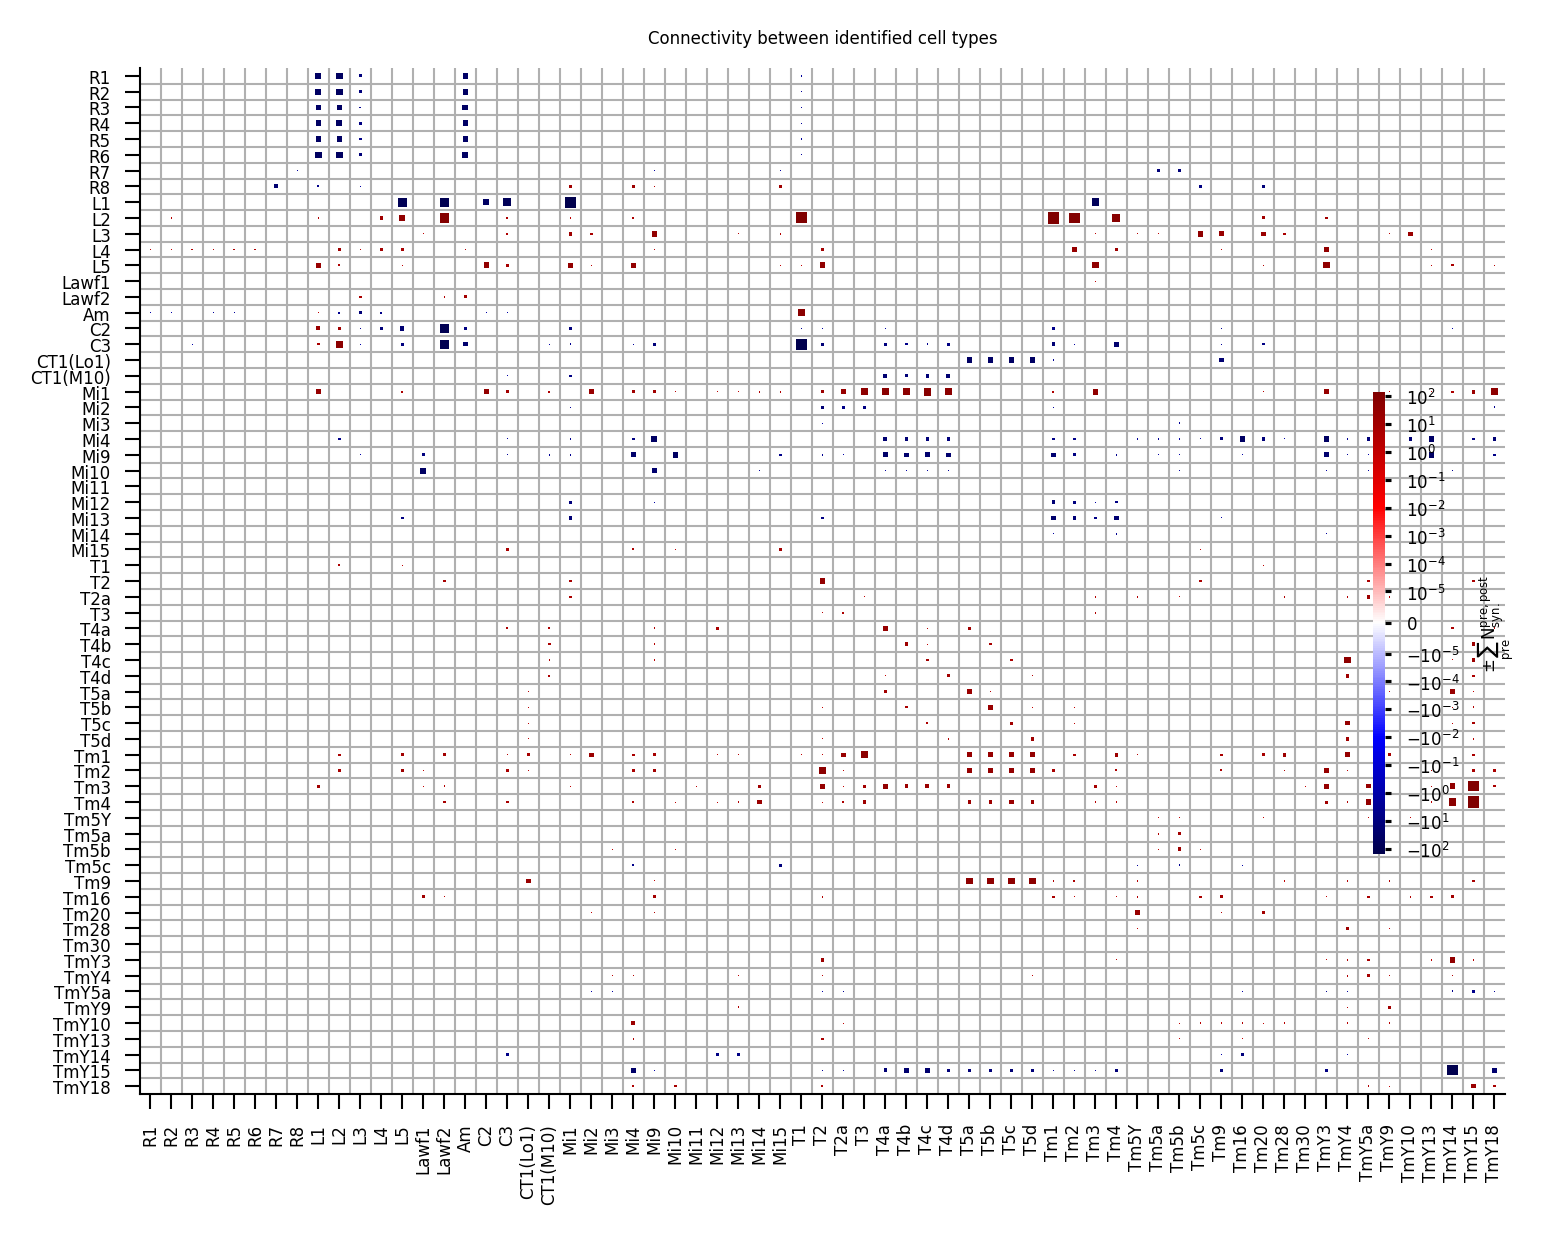

In [6]:
fig = connectome_view.connectivity_matrix("n_syn")

## Example receptive fields
Example of convolutional filter, representing inputs onto cells of the target cell type. Values represent the average number of synapses projecting from presynaptic cells in columns with indicated offset onto the postsynaptic dendrite. Values indicate connection strength derived from electron microscopy data.

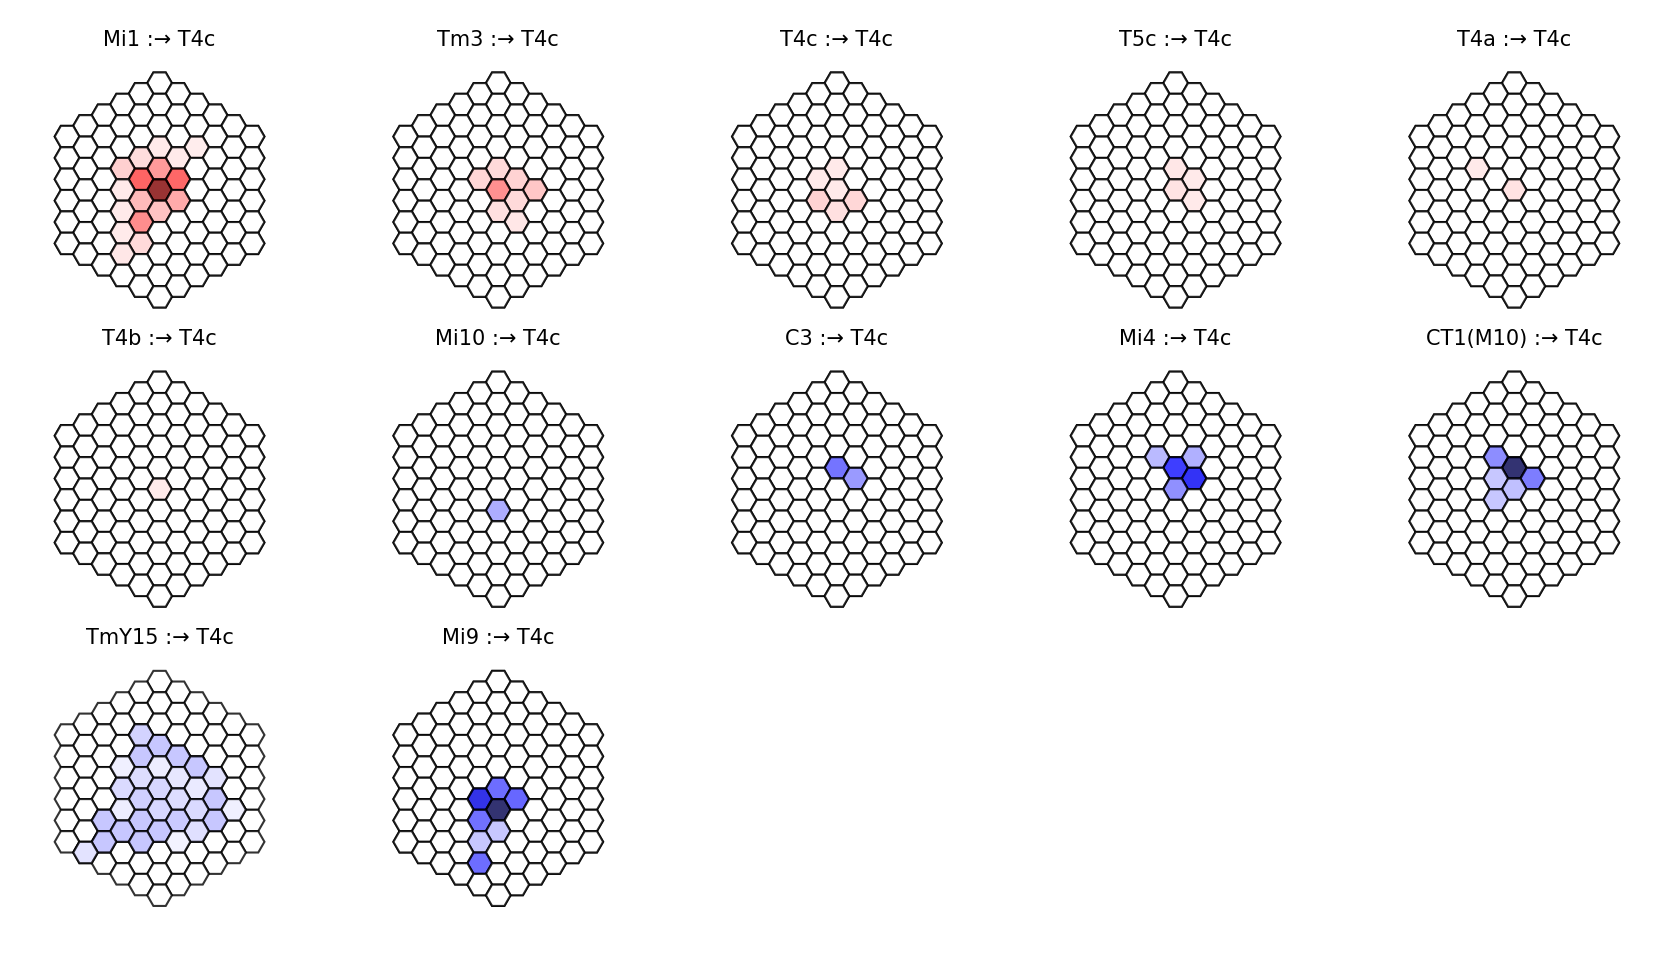

In [7]:
fig = connectome_view.receptive_fields_grid("T4c")

## Example projective fields
Example of projective fields, representing outputs of a source cell type onto target cells. Values represent the average number of synapses projecting from the presynaptic cell onto postsynaptic dendrites in columns with indicated offset. Values indicate connection strength derived from electron microscopy data.

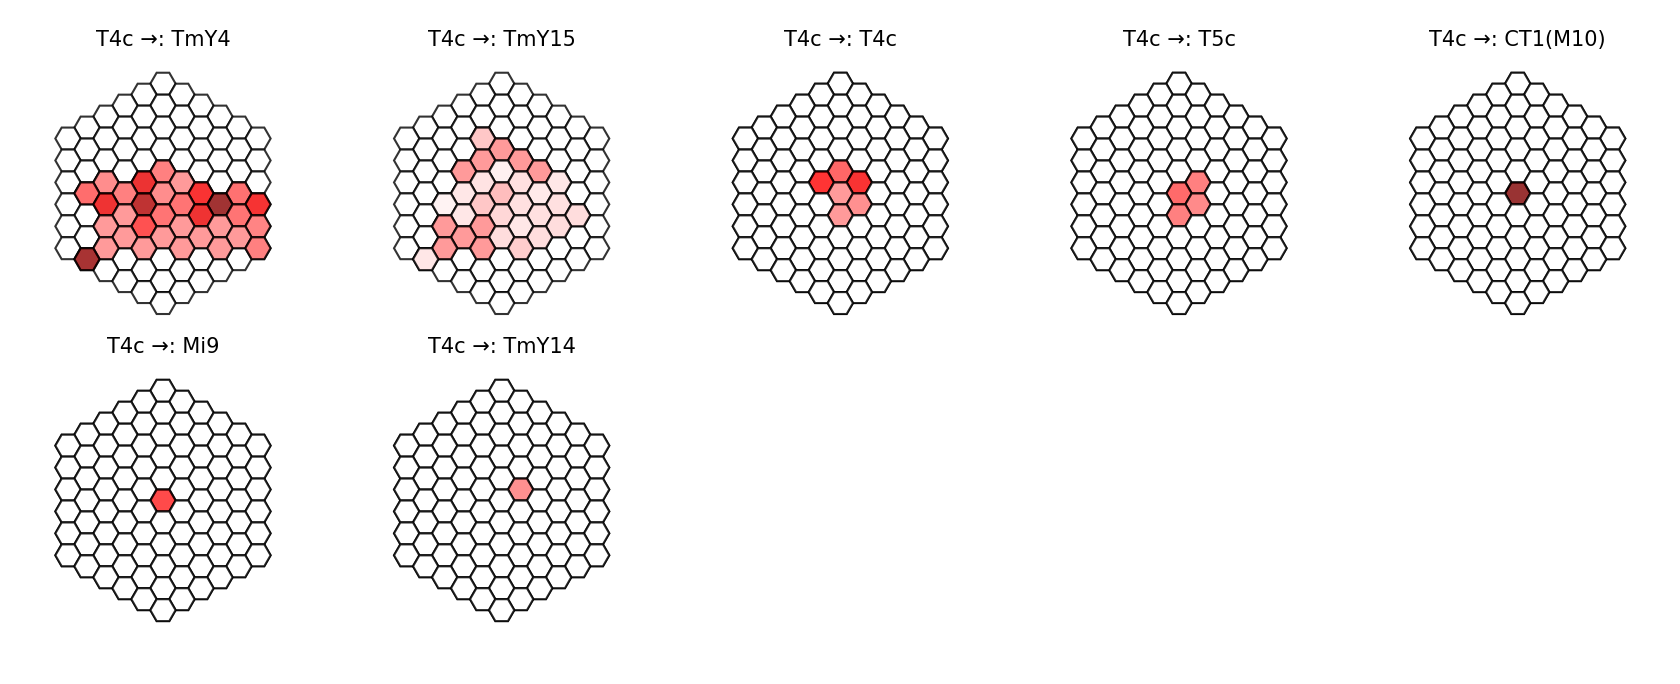

In [8]:
fig = connectome_view.projective_fields_grid("T4c")

## Network layout

Our retinotopic hexagonal lattice network organizes cells of each cell type into visual columns corresponding to photoreceptor locations to capture the crystalline, hexagonal structure of the fly eye. Some cell types are non-columnar, i.e. their cells occur only in every other column---here Lawf1 and Lawf2 cell types---as estimated by our connectome construction algorithm. The edges represent pairs of connected cell types. For the task, we decoded from T-shaped and transmedullary cells (within the black box).

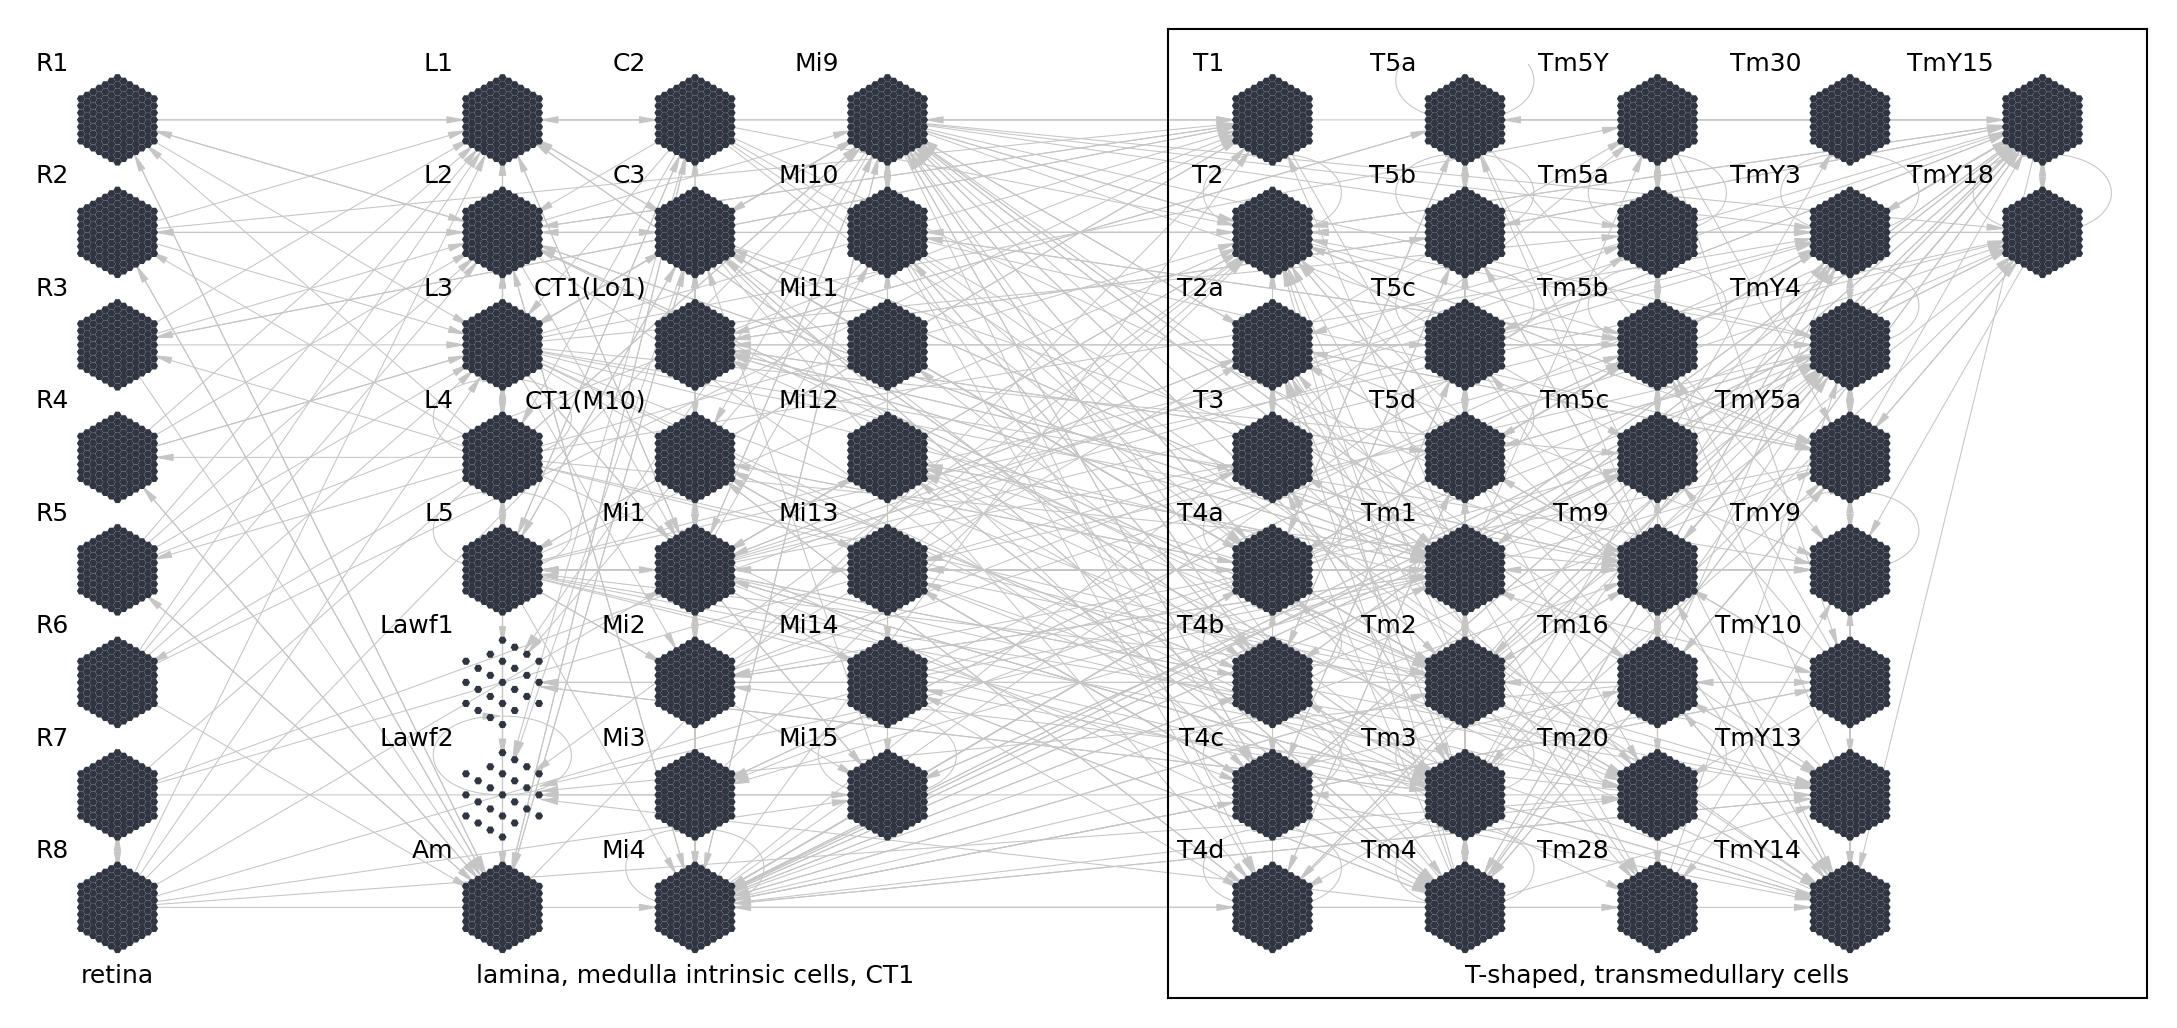

In [9]:
# cause the layout is spatially periodic it suffices to visualize a few columns
# to get the gist of the layout which can be controlled using max_extent
fig = connectome_view.network_layout(max_extent=6)